In [3]:
Packages <- c("dplyr","broom","cubature", "geosphere", "data.table",  "ggplot2", "bbmle", "dplyr","tidyr", "stringr", "tidyverse", "lubridate", "RColorBrewer")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/oceanography')
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0
source("~/parentage/kernel_fitting/1340_loci/functions/ll_kt_both_bbmle.R")
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum0.5.R") #integrate_kernel_sum1
source("~/parentage/kernel_fitting/1340_loci/functions/GenGausKernInt_sum1.R") #integrate_kernel_sum0.5
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve.R") #median
source("~/parentage/kernel_fitting/1340_loci/functions/cdf_solve90.R") #dist 90% retained


In [ ]:
#calculate summary stats like mdd, median, kerutosis, and dist 90 retained
#plot summary stats with overlays of empirical fits
#test for rank ordered correlations


In [83]:
#read in the kernel ensembles with no adjustments
SimKernels2012 <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2012.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernels2013 <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2013.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernels2014 <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2014.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="no")
SimKernelsAll <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsAll.csv", header=T) %>%
    mutate(year="2012-14") %>%
    mutate(Adj="no")


#read in the kernel ensembles with survival and growth adjustments
SimKernels2012SurvGrowth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2012SurvGrowth.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvGrowth")
SimKernels2013SurvGrowth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2013SurvGrowth.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvGrowth")
SimKernels2014SurvGrowth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2014SurvGrowth.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="SurvGrowth")
SimKernelsAllSurvGrowth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsAllSurvGrowth.csv", header=T) %>%
    mutate(year="2012-14") %>%
    mutate(Adj="SurvGrowth")


#read in the kernel ensembles with only growth adjustments
SimKernels2012Growth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2012Growth.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Growth")
SimKernels2013Growth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2013Growth.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Growth")
SimKernels2014Growth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernels2014Growth.csv", header=T) %>%
    mutate(year=as.character(year)) %>%
    mutate(Adj="Growth")
SimKernelsAllGrowth <- read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsAllGrowth.csv", header=T) %>%
    mutate(year="2012-14") %>%
    mutate(Adj="Growth")

CombinedSims <- bind_rows(SimKernels2012, SimKernels2013, SimKernels2014,  SimKernelsAll, SimKernels2012SurvGrowth, SimKernels2013SurvGrowth, SimKernels2014SurvGrowth,  SimKernelsAllSurvGrowth, SimKernels2012Growth, SimKernels2013Growth, SimKernels2014Growth,  SimKernelsAllGrowth) 




In [84]:
head(CombinedSims)

year,k,theta,mdd,med,dist90,iteration,Adj
2012,-2.219979,1.0774696,8.332389,5.94,18.95,1,no
2012,-2.928858,3.3147822,9.318524,8.54,18.05,2,no
2012,-1.505833,0.7124820,8.570525,5.07,20.80,3,no
2012,-1.324005,0.6553768,8.889716,5.02,21.82,4,no
2012,-2.512072,1.5726764,7.876530,6.31,16.84,5,no
2012,-2.025309,0.9314346,8.436129,5.68,19.65,6,no


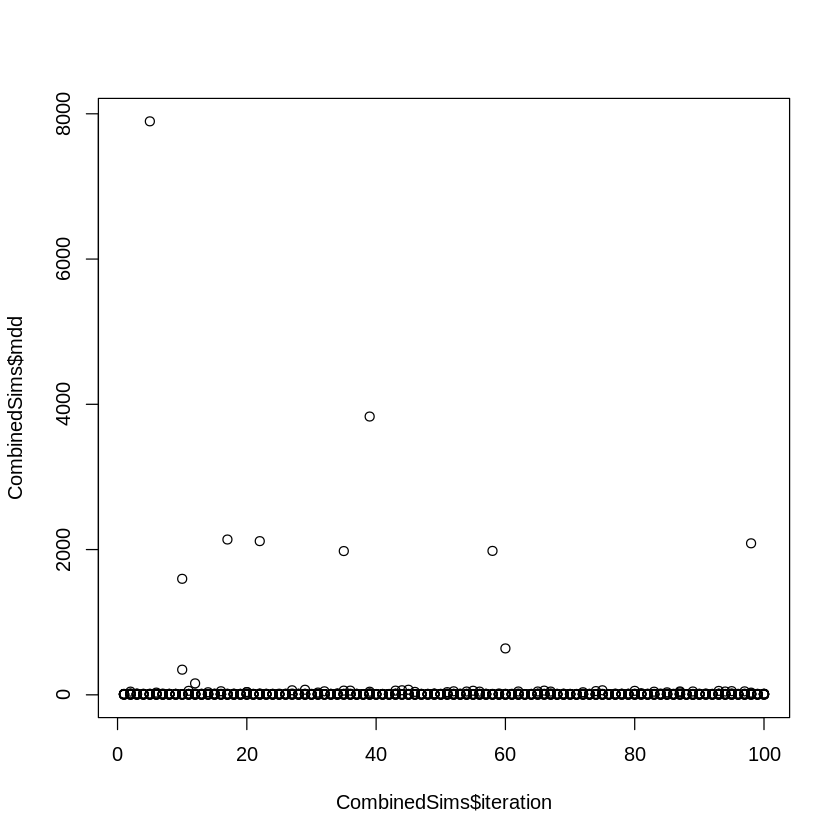

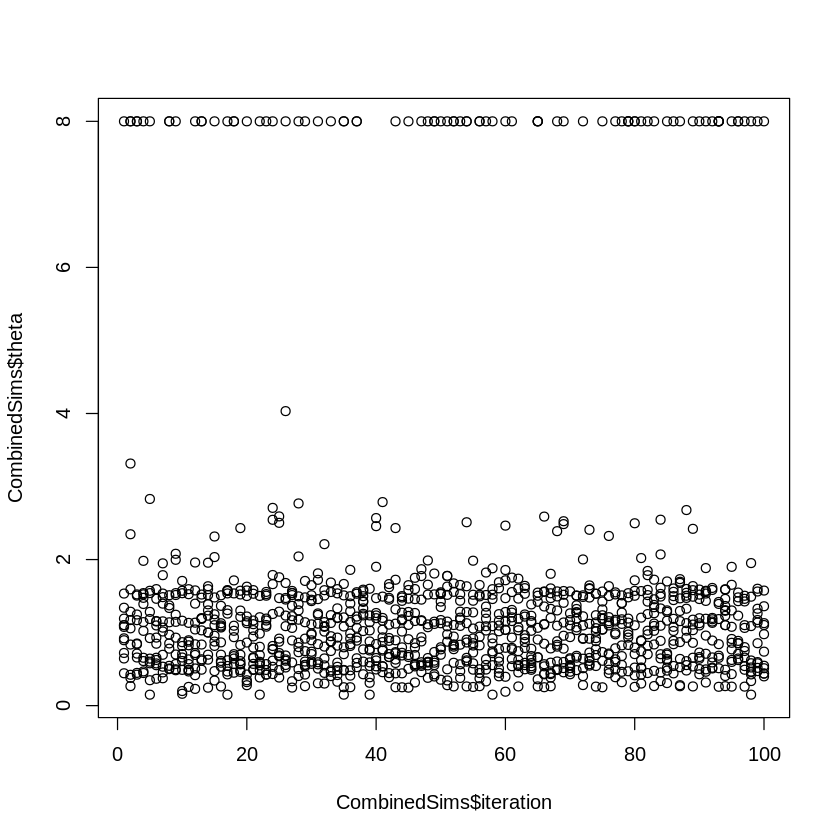

In [85]:
#check for obvious bias based on iteration, which would point to a problem in the for loop. Seems fine to me though 03/23/2021
plot(CombinedSims$mdd ~ CombinedSims$iteration)
plot(CombinedSims$theta ~ CombinedSims$iteration)

In [87]:
#what is that outlier super high mean dispersal distance?
#CombinedSims %>% filter(mdd==max(mdd))

#that's a fit where theta is at the boundary, not a good fit
CombinedSims %>%
    group_by(Adj, year) %>%
    filter(k==10 |k==-10 | theta==0.15 |theta== 8) %>% #how often are the fits at the boundary? as in, bad
    summarise(NObsBoundary=n()) %>%
    arrange(NObsBoundary)

#what is going on with 2014??

`summarise()` regrouping output by 'Adj' (override with `.groups` argument)


Adj,year,NObsBoundary
SurvGrowth,2012,1
Growth,2012,3
Growth,2012-14,3
no,2012,3
no,2012-14,3
SurvGrowth,2012-14,6
no,2014,32
SurvGrowth,2014,40


In [88]:
AverageFits <-  CombinedSims %>% 
    select(-iteration) %>%
    group_by(year, Adj) %>%
    summarise_each(funs(mean)) %>%
    rename(Year="year", AvgSimK="k", AvgSimTheta="theta", AvgSimMDD="mdd", AvgSimMed="med", AvgSimDist90="dist90")


In [89]:
#read in the empirical data
kernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/kernel_fitting_summary.csv", header=T, stringsAsFactors = F) %>%
    select(Year, best_k, best_theta, MeanDispDist, MedianDispDist, Dist90Retained) %>%
    rename(GenK="best_k", GenTheta="best_theta", GenMDD="MeanDispDist", GenMed="MedianDispDist", GenDist90="Dist90Retained") %>%
    mutate(GenMDD=round(GenMDD, digits=2))

kernel2012_14 <- read.csv(file="~/oceanography/empirical_data/genetics/GenKernelsForROMSComp2012-14.csv", header=T, stringsAsFactors = F) %>%
    rename(Year="year",GenK="k", GenTheta="theta", GenMDD="mdd", GenMed="med", GenDist90="dist90") %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2))

kernels2 <- bind_rows(kernels, kernel2012_14)

In [90]:
SimPlusGenFits <- inner_join(AverageFits, kernels2, by="Year")

#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFits.csv", row.names=F)

In [190]:
#what simulations best represent the genetic data, based on MDD as a rough summary stat that incorporates shape and scale of fit
SimPlusGenFits %>%
    mutate(MDDDiffGenVSim=abs(GenMDD-AvgSimMDD)) %>%
    group_by(Year) %>%
    arrange(MDDDiffGenVSim) %>%
    filter(MDDDiffGenVSim==min(MDDDiffGenVSim))
SimPlusGenFits %>%
    mutate(MDDDiffGenVSim=abs(GenMDD-AvgSimMDD)) %>%
    group_by(Year) %>%
    arrange(MDDDiffGenVSim)

#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFitsAnnual.csv", row.names=F)

Year,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
2014,SurvGrowth,-2.3802358,3.8520266,18.846375,10.8199,40.6609,0.49,0.38,15.04,5.53,38.13,3.806375
2012-14,SurvGrowth,-1.9839337,1.4253394,10.396624,6.9253,23.8995,1.68,0.30,27.77,7.71,68.69,17.373376
2012,SurvGrowth,-0.9639603,0.8341060,53.583493,9.4732,103.3416,-2.36,1.03,10.17,7.13,23.29,43.413493
2013,SurvGrowth,-0.2318309,0.5183847,9.163819,4.1083,22.8942,4.04,0.22,69.59,12.20,157.36,60.426181


Year,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
2014,SurvGrowth,-2.3802358,3.8520266,18.846375,10.8199,40.6609,0.49,0.38,15.04,5.53,38.13,3.806375
2014,Growth,-1.0822059,1.1504845,2.482421,1.8112,5.5850,0.49,0.38,15.04,5.53,38.13,12.557579
2012-14,SurvGrowth,-1.9839337,1.4253394,10.396624,6.9253,23.8995,1.68,0.30,27.77,7.71,68.69,17.373376
2012-14,Growth,-2.0718045,1.2922321,10.319370,6.9171,23.6593,1.68,0.30,27.77,7.71,68.69,17.450630
2012-14,no,-2.1168760,1.2847107,10.034483,6.8475,22.9502,1.68,0.30,27.77,7.71,68.69,17.735517
2012,SurvGrowth,-0.9639603,0.8341060,53.583493,9.4732,103.3416,-2.36,1.03,10.17,7.13,23.29,43.413493
2012,Growth,-1.2401682,1.0141959,54.772800,9.5074,103.3188,-2.36,1.03,10.17,7.13,23.29,44.602800
2013,SurvGrowth,-0.2318309,0.5183847,9.163819,4.1083,22.8942,4.04,0.22,69.59,12.20,157.36,60.426181
2013,no,-1.2290446,0.7932327,8.161916,4.7062,19.6010,4.04,0.22,69.59,12.20,157.36,61.428084
2013,Growth,-1.5648790,1.5320504,3.114230,2.4757,6.6854,4.04,0.22,69.59,12.20,157.36,66.475770


In [167]:
head(CombinedSims)
head(SimPlusGenFits)

year,k,theta,mdd,med,dist90,iteration,Adj
2012,-2.219979,1.0774696,8.332389,5.94,18.95,1,no
2012,-2.928858,3.3147822,9.318524,8.54,18.05,2,no
2012,-1.505833,0.7124820,8.570525,5.07,20.80,3,no
2012,-1.324005,0.6553768,8.889716,5.02,21.82,4,no
2012,-2.512072,1.5726764,7.876530,6.31,16.84,5,no
2012,-2.025309,0.9314346,8.436129,5.68,19.65,6,no


Year,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,GenK,GenTheta,GenMDD,GenMed,GenDist90
2012,Growth,-1.2401682,1.014196,54.77280,9.5074,103.3188,-2.36,1.03,10.17,7.13,23.29
2012,no,-1.1599438,1.027954,88.98848,12.4508,164.7406,-2.36,1.03,10.17,7.13,23.29
2012,SurvGrowth,-0.9639603,0.834106,53.58349,9.4732,103.3416,-2.36,1.03,10.17,7.13,23.29
2012-14,Growth,-2.0718045,1.292232,10.31937,6.9171,23.6593,1.68,0.30,27.77,7.71,68.69
2012-14,no,-2.1168760,1.284711,10.03448,6.8475,22.9502,1.68,0.30,27.77,7.71,68.69
2012-14,SurvGrowth,-1.9839337,1.425339,10.39662,6.9253,23.8995,1.68,0.30,27.77,7.71,68.69


Warning message:
“Removed 11 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 11 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

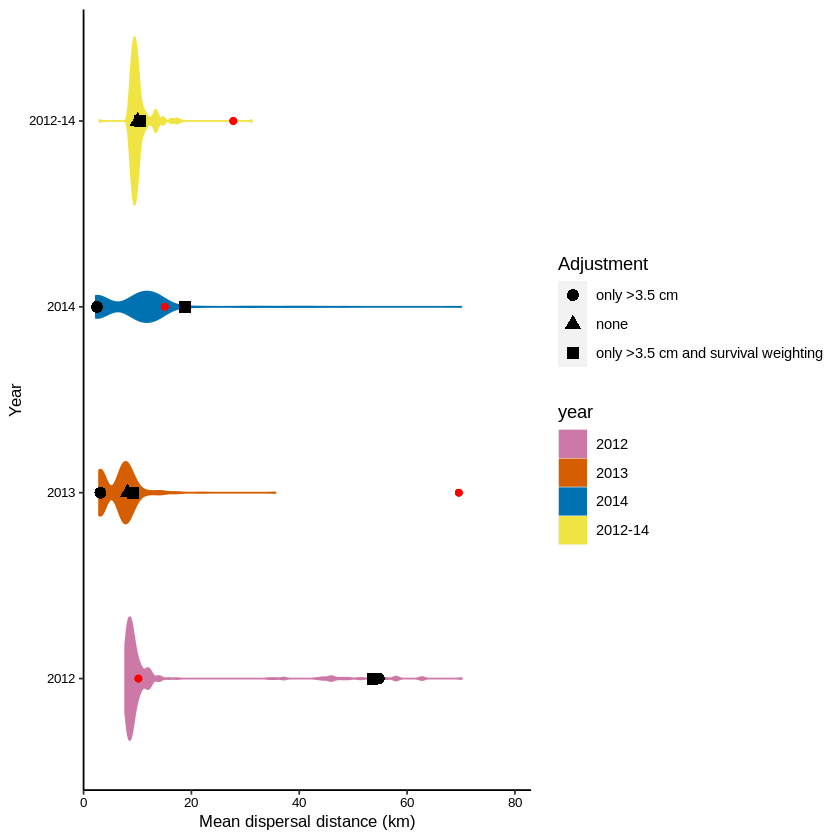

In [183]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

CombinedSims$year <- factor(CombinedSims$year, levels=c("2012", "2013", "2014", "2012-14"))
SimPlusGenFits$Year <- factor(SimPlusGenFits$Year, levels=c("2012", "2013", "2014", "2012-14"))

mdd_violin <- ggplot(data=CombinedSims, aes(x=year, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_violin() +
    geom_point(data=SimPlusGenFits, aes(x=Year, y=AvgSimMDD, shape=Adj), fill=NA, color="black", size=3) + 
    geom_point(data=SimPlusGenFits, aes(x=Year, y=GenMDD), fill="red", color="red") + # with all fits
    #geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    scale_shape_discrete(name = "Adjustment", labels = c("only >3.5 cm", "none", "only >3.5 cm and survival weighting"))+
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 83), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica")) + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
#ggplot2::ggsave(filename="SimMeanDispDistPlusGenPoints.png",  plot=mdd_violin, width=83, height=70, units="mm", path="~/oceanography/script_output/KernelFits/Plots/")


In [161]:
#read in the seasonal simulation kernel fits

#no adjustments
SimulatedKernelsNEM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEM.csv", header=T) %>%
    mutate(Adj="no")
SimulatedKernelsSWM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWM.csv", header=T) %>%
    mutate(Adj="no")

#adjusting for survival and growth
SimulatedKernelsNEMSurvGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEMSurvGrowth.csv", header=T) %>%
    mutate(Adj="SurvGrowth")
SimulatedKernelsSWMSurvGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWMSurvGrowth.csv", header=T) %>%
    mutate(Adj="SurvGrowth")

#adjusting for growth
SimulatedKernelsNEMGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEMGrowth.csv", header=T) %>%
    mutate(Adj="Growth")
SimulatedKernelsSWMGrowth <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWMGrowth.csv", header=T) %>%
    mutate(Adj="Growth")

CombinedSeasons <- bind_rows(SimulatedKernelsNEM, SimulatedKernelsSWM, SimulatedKernelsNEMSurvGrowth, SimulatedKernelsSWMSurvGrowth, SimulatedKernelsNEMGrowth, SimulatedKernelsSWMGrowth) %>%
    rename(Season="season") 

#empirical seasons for 2012-2014
SeasonalKernels2012_14 <- read.csv(file="~/oceanography/empirical_data/genetics/SeasonalGenKernelsForROMSComp.csv", header=T) %>%
    rename(Season="season",GenK="k", GenTheta="theta", GenMDD="mdd", GenMed="med", GenDist90="dist90") %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2)) %>%
    mutate(TimeFrame="2012-14")#%>%
    #mutate(JoinKey="all")


SeasonalKernels2012_18 <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/RecruitSizeAsSeasonlity_summary.csv", header=T) %>%
    select(Season, best_k, best_theta, MeanDispersalDistance, MedianDispersalDistance, Dist90Retained) %>%    
    rename(GenK="best_k", GenTheta="best_theta", GenMDD="MeanDispersalDistance", GenMed="MedianDispersalDistance", GenDist90="Dist90Retained") %>%
    mutate(GenMDD=round(GenMDD, digits=2)) %>%
    mutate(TimeFrame="2012-18")#%>%
    #mutate(JoinKey="all")

GenSeasonalKernels <- bind_rows(SeasonalKernels2012_14, SeasonalKernels2012_18)

In [151]:
head(CombinedSeasons)

Season,k,theta,mdd,med,dist90,iteration,Adj
NEM,-2.49,1.30,8.94,6.78,19.71,1,no
NEM,0.85,0.34,21.84,7.14,55.00,2,no
NEM,-1.38,0.64,10.05,5.59,24.73,3,no
NEM,-2.06,0.91,9.06,6.05,21.17,4,no
NEM,-2.52,1.33,9.04,6.91,19.86,5,no
NEM,-1.92,0.84,9.04,5.82,21.40,6,no


In [162]:
AvgSeasonalKernels <- CombinedSeasons %>% 
    select(-iteration) %>%
    group_by(Season, Adj) %>%
    summarise_each(funs(mean)) %>%
    mutate(k=round(k, digits=2)) %>%
    mutate(theta=round(theta, digits=2)) %>%
    mutate(mdd=round(mdd, digits=2))%>%
    mutate(med=round(med, digits=2))%>%
    mutate(dist90=round(dist90, digits=2)) %>%
    rename(AvgSimK="k", AvgSimTheta="theta", AvgSimMDD="mdd", AvgSimMed="med", AvgSimDist90="dist90") %>%
    mutate(TimeFrame="2012-14")# %>%
    #mutate(JoinKey="all")

In [189]:
SimPlusGenFitsSeasons <- right_join(AvgSeasonalKernels, GenSeasonalKernels, by=c("Season", "TimeFrame"))%>%
    mutate(MDDDiffGenVSim=abs(GenMDD-AvgSimMDD)) %>%
    arrange(MDDDiffGenVSim) %>%
    mutate(GenK=round(GenK, digits=2)) %>%
    mutate(GenTheta=round(GenTheta, digits=2)) %>%
    mutate(GenMDD=round(GenMDD, digits=2))

SimPlusGenFitsSeasons %>%
    group_by(Season) %>%
    filter(MDDDiffGenVSim==min(MDDDiffGenVSim, na.rm=T))

SimPlusGenFitsSeasons

#write.csv(SimPlusGenFits, file="~/oceanography/script_output/KernelFits/SimPlusGenKernelFitsSeasons.csv", row.names=F)

Season,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,TimeFrame,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
SWM,no,-2.45,1.39,8.58,6.57,18.77,2012-14,-1.62,0.76,8.34,5.1,20.07,0.24
NEM,SurvGrowth,-2.02,1.17,10.10,6.69,23.37,2012-14,6.95,0.15,2755.86,212.8,4810.04,2745.76


Season,Adj,AvgSimK,AvgSimTheta,AvgSimMDD,AvgSimMed,AvgSimDist90,TimeFrame,GenK,GenTheta,GenMDD,GenMed,GenDist90,MDDDiffGenVSim
SWM,no,-2.45,1.39,8.58,6.57,18.77,2012-14,-1.62,0.76,8.34,5.10,20.07,0.24
SWM,SurvGrowth,-2.44,1.37,8.63,6.59,18.94,2012-14,-1.62,0.76,8.34,5.10,20.07,0.29
SWM,Growth,-2.40,1.32,8.66,6.52,19.13,2012-14,-1.62,0.76,8.34,5.10,20.07,0.32
NEM,SurvGrowth,-2.02,1.17,10.10,6.69,23.37,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.76
NEM,Growth,-2.04,1.17,10.01,6.66,23.13,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.85
NEM,no,-2.08,1.26,9.95,6.72,22.82,2012-14,6.95,0.15,2755.86,212.80,4810.04,2745.91
SWM,NA,NA,NA,NA,NA,NA,2012-18,-2.60,1.58,8.57,6.87,18.32,NA
NEM,NA,NA,NA,NA,NA,NA,2012-18,-0.89,0.56,9.45,4.82,23.60,NA


Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Removed 2 rows containing missing values (geom_point).”Warning message:
“Removed 3 rows containing missing values (geom_point).”

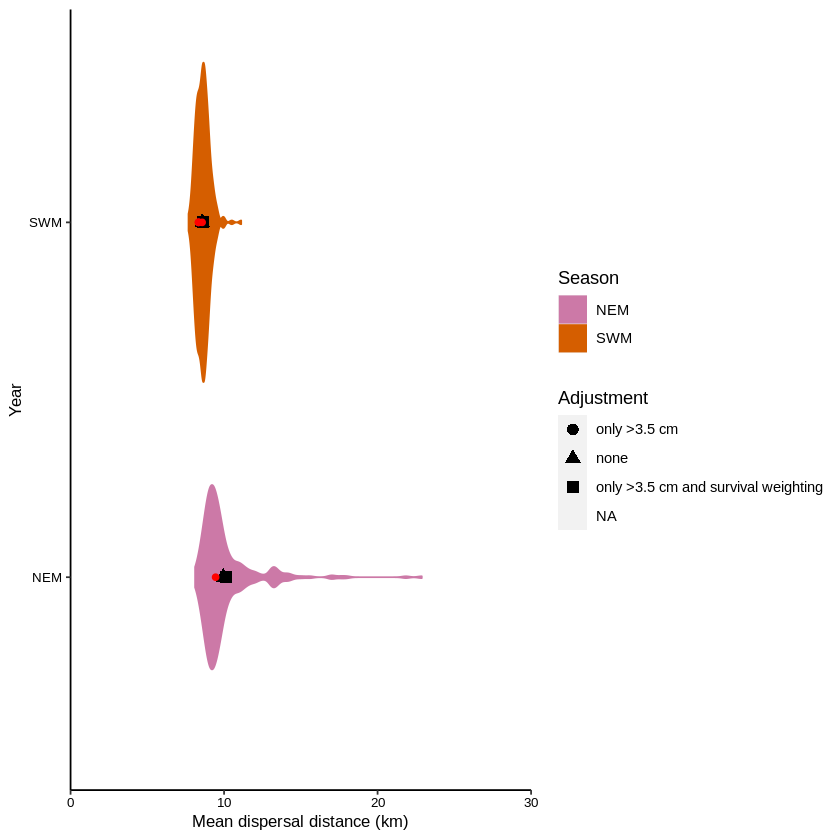

In [188]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

#CombinedSeasons$Season <- factor(CombinedSeasons$Season, levels=c("2012", "2013", "2014", "2012-14"))
#SimPlusGenFitsSeasons$Season <- factor(SimPlusGenFitsSeasons$Season, levels=c("2012", "2013", "2014", "2012-14"))

mdd_violin <- ggplot(data=CombinedSeasons, aes(x=Season, y=mdd, color=Season, fill=Season), alpha=0.5) +
    geom_violin() +
    geom_point(data=SimPlusGenFitsSeasons, aes(x=Season, y=AvgSimMDD, shape=Adj), fill=NA, color="black", size=3) + 
    geom_point(data=SimPlusGenFitsSeasons, aes(x=Season, y=GenMDD), fill="red", color="red") + # with all fits
    #geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    scale_shape_discrete(name = "Adjustment", labels = c("only >3.5 cm", "none", "only >3.5 cm and survival weighting"))+
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 30), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica")) + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
#ggplot2::ggsave(filename="SimMeanDispDistPlusGenPointsSeasonsZoom.png",  plot=mdd_violin, width=83, height=70, units="mm", path="~/oceanography/script_output/KernelFits/Plots/")


Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing missing values (geom_point).”Warning message:
“Removed 9 rows containing non-finite values (stat_ydensity).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

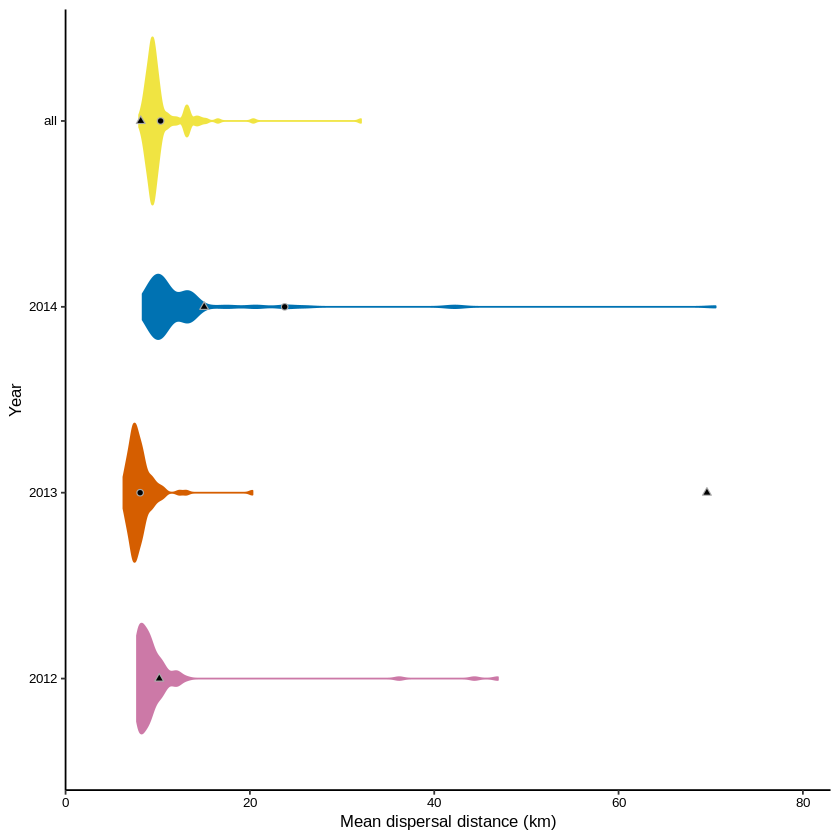

In [111]:
cbbPalette <- c("#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
cbbPalette_rev <- rev(cbbPalette)

mdd_violin <- ggplot(data=SimCombinedSummary, aes(x=year, y=mdd, color=year, fill=year), alpha=0.5) +
    geom_violin() +
    #geom_point(data=AverageFits2, aes(x=year, y=mdd), fill="snow",color="darkgray", shape=21) + #without borderline fits
    geom_point(data=AverageFits, aes(x=year, y=mdd), fill="black ",color="darkgray", shape=21) + # with all fits
    geom_point(data=kernels %>% filter(Year %in% c("2012", "2013", "2014", "all")), aes(x=Year, y=MeanDispDist), fill="black",color="darkgray", shape=24) + #genetic estimates
    coord_flip() +
    #scale_x_continuous(limits = c(0, 100), expand=c(0,0)) +
    scale_y_continuous(limits = c(0, 83), expand = c(0,0))+
    theme(panel.grid.major = element_blank(),
    plot.margin=unit(c(0.2,0.2,0.2,0.2),"cm"),
    panel.grid.minor = element_blank(), 
    panel.background = element_blank(), #,
    axis.line = element_line(colour = "black")) +
    xlab("Year") + 
    ylab("Mean dispersal distance (km)") +
    theme(axis.text.x = element_text(size=8, color="black", family="Helvetica"),#15 for publication, 20 for presentation #element_text(size=15, color="black", family="Helvetica"),
    axis.text.y =  element_text(size=8, color="black", family="Helvetica"),
    axis.title.y =  element_text(size=10, color="black", family="Helvetica"), 
    axis.title.x =  element_text(size=10, color="black", family="Helvetica"),    
    legend.position = "none") + 
    scale_colour_manual(values=cbbPalette_rev)+
    scale_fill_manual(values=cbbPalette_rev)
    #scale_y_continuous(breaks = 1:2000, labels = c(1:50,"break",1000:2000))
mdd_violin
#ggplot2::ggsave(filename="SimMeanDispDistPlusGenPoints.png",  plot=mdd_violin, width=83, height=70, units="mm", path="~/oceanography/script_output/KernelFits/Plots/")


In [115]:
(SimPlusGenFits)

year,SimK,SimTheta,SimMDD,SimKurtosis,GenK,GenTheta,GenMDD,GenMedDispDist
2012,-1.828326,1.250510,10.127328,15.518027,-2.36,1.03,10.165094,7.13
2013,-1.242150,0.804757,8.091848,13.967938,4.04,0.22,69.586280,12.20
2014,-1.926596,1.243059,26.376964,86.415760,0.49,0.38,15.037515,5.53
all,-1.919426,1.014670,10.219857,8.635482,-2.51,1.49,8.153016,6.44


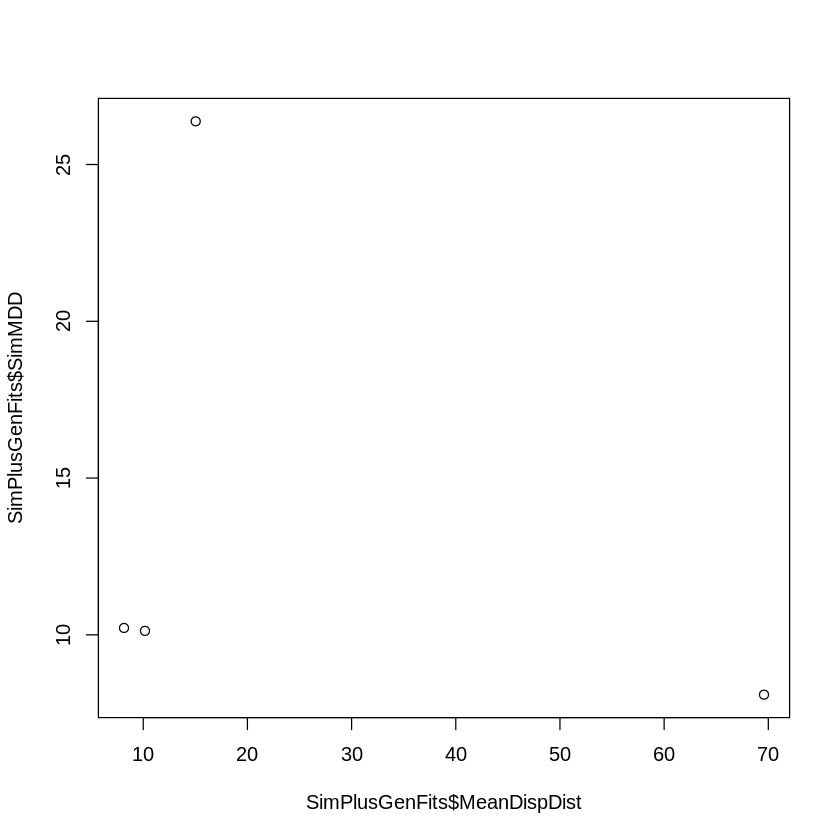

In [95]:
plot(SimPlusGenFits$SimMDD~SimPlusGenFits$MeanDispDist)

In [60]:
MDDAllYear <- CombinedSims %>% 
    filter(year=="all")
#pdf("~/oceanography/script_output/KernelFits/Plots/MeanDispDistHist2012-14.pdf")
hist(MDDAllYear$mdd, breaks=100, main=NULL, xlab="Mean dispersal distance (km)")
#dev.off()
summary(MDDAllYear$mdd)

Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in hist.default(MDDAllYear$mdd, breaks = 100, main = NULL, xlab = "Mean dispersal distance (km)"): character(0)


In [97]:
#test for correlations
cor.test(SimPlusGenFits$SimMDD, SimPlusGenFits$MeanDispDist,  method = "pearson")
cor.test(SimPlusGenFits$SimTheta, SimPlusGenFits$GenTheta,  method = "pearson")



	Pearson's product-moment correlation

data:  SimPlusGenFits$SimMDD and SimPlusGenFits$MeanDispDist
t = -0.53384, df = 2, p-value = 0.6468
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9812079  0.9202897
sample estimates:
       cor 
-0.3531582 



	Pearson's product-moment correlation

data:  SimPlusGenFits$SimTheta and SimPlusGenFits$GenTheta
t = 0.32913, df = 2, p-value = 0.7733
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9389710  0.9752907
sample estimates:
      cor 
0.2266754 


In [17]:
#seasons
SimulatedKernelsNEM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsNEM.csv", header=T)
SimulatedKernelsSWM <-  read.csv(file="~/oceanography/script_output/KernelFits/100SimulatedKernelsSWM.csv", header=T)
CombinedSeasons <- bind_rows(SimulatedKernelsNEM, SimulatedKernelsSWM) %>%
    select(-iteration)

In [24]:
SeasonalKernels <- read.csv(file="~/parentage/kernel_fitting/1340_loci/final_results/tables/RecruitSizeAsSeasonlity_summary.csv", header=T)
head(SeasonalKernels)

Season,RecruitSizeAtSampling,best_k,best_theta,k_CI95_lower,k_CI95_upper,theta_CI95_lower,theta_CI95_upper,MeanDispersalDistance,MeanDispDist_CI95_lower,MeanDispDist_CI95_upper,MedianDispersalDistance,MedianDispDist_CI95_lower,MedianDispDist_CI95_upper,Dist90Retained
SWM,> 4.5 cm,-2.60,1.58,-2.63,-2.47,1.34,1.59,8.574871,7.132250,10.39623,6.87,4.93,9.28,18.32
NEM,< 3.5 cm,-0.89,0.56,-1.46,-0.74,0.54,0.61,9.446898,6.014163,4272.46841,4.82,3.24,323.37,23.60
